In [1]:
# %load ../init_setup/setup
# ==- INITIAL SETUP -===============================================================================
import math
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
from ipywidgets import interact

np.set_printoptions(formatter={'float': '{: 0.5f}'.format}, suppress = True)
matplotlib.rcParams.update({'font.size': 20})
plt.style.use('seaborn-whitegrid')

# ==- PLOT PARAMETERS -=============================================================================
loglogalpha = 0.70
baralpha    = 0.85

plot_size = (14,8)
subplot_size = (7,4)

# ==- COLOR PALETTE -===============================================================================
c_red = "#e6194b" # red
c_gre = "#3cb44b" # green
c_yel = "#ffe119" # yellow
c_blu = "#4363d8" # blue
c_ora = "#f58231" # orange
c_pur = "#911eb4" # purple
c_cya = "#42d4f4" # cyan
c_mag = "#f032e6" # magenta
c_lim = "#bfef45" # lime
c_pin = "#fabebe" # pink
c_tea = "#469990" # teal
c_lav = "#e6beff" # lavender
c_bro = "#9A6324" # brown
c_bei = "#fffac8" # beige
c_mar = "#800000" # maroon
c_min = "#aaffc3" # mint
c_oli = "#808000" # olive
c_apr = "#ffd8b1" # apricot
c_nav = "#000075" # navy
c_gra = "#a9a9a9" # gray
c_whi = "#ffffff" # white
c_bla = "#000000" # black

accessibility_95    = [c_red, c_gre, c_blu, c_yel, c_ora, c_pur, c_cya,
                       c_mag, c_lim, c_pin, c_tea, c_lav, c_bro, c_bei,
                       c_mar, c_min, c_oli, c_apr, c_nav, c_gra, c_bla]
accessibility_99    = [c_red, c_gre, c_blu, c_yel, c_ora, c_cya, c_mag,
                       c_pin, c_tea, c_lav, c_bro, c_bei, c_mar, c_min,
                       c_nav, c_gra, c_bla]
accessibility_99_99 = [c_blu, c_yel, c_ora, c_pin, c_lav, c_mar, c_nav,
                       c_gra, c_bla]
accessibility_100   = [c_blu, c_yel, c_gra, c_bla]


In [2]:
# %load ../init_setup/setup2
matplotlib.rcParams.update({'font.size': 20})


In [3]:
# Read a file containing one array
def file_to_arr(filename):
    arr = []
    f = open(filename, "r")

    for line in f:
        meas = float(line.replace("\n", ""))
        arr.append(meas)
    
    f.close()
    return np.array(arr)

# Interpolation Accuracy vs Time

In [45]:
colors = [c_bla, c_mar, c_red, c_pin, c_mar, c_red, c_pin, c_mar, c_red, c_pin, 
          c_mar, c_red, c_pin, c_mar, c_red, c_pin, c_mar, c_red, c_pin]
markers = ["P",   "v",   "v",   "v",   "o",   "o",   "o",   "s",   "s",   "s",
           "*",   "*",   "*",   "D",   "D",   "D",   "p",   "p",   "p"]
names = ["real B",                  "int B ($ss=200, r=400$)", "int B ($ss=200, r=200$)", "int B ($ss=200, r=100$)", 
         "int B ($ss=100, r=400$)", "int B ($ss=100, r=200$)", "int B ($ss=100, r=100$)", 
         "int B ($ss=50, r=400$)",  "int B ($ss=50, r=200$)",  "int B ($ss=50, r=100$)", 
         "int B ($ss=20, r=400$)",  "int B ($ss=20, r=200$)",  "int B ($ss=20, r=100$)", 
         "int B ($ss=10, r=400$)",  "int B ($ss=10, r=200$)",  "int B ($ss=10, r=100$)",
         "int B ($ss=5, r=400$)",   "int B ($ss=5, r=200$)",   "int B ($ss=5, r=100$)"]
avg_fchi2 = [1.,                 122.59054174746021, 122.59054174746021, 122.59054174746021, 
             1.7330013222060718, 1.7330013222060718, 1.7330013222060718, 1.4190169657940002, 
             1.4190169657940002, 1.4190169657940002, 1.4136513546121674, 1.4136513546121674,
             1.4136513546121674, 1.3822203302209861, 1.3822203302209861, 1.3822203302209861,
             1.3829756488152811, 1.3829756488152811, 1.3829756488152811]
total_time = [113.63, 123.74, 110.53, 106.63, 108.56,  98.61,  96.31, 106.13, 107.14, 105.30, 
              102.24, 106.97, 107.85,  96.78,  96.30, 105.28,1048.30, 105.20, 101.79]
tracks_dropped = [126,  2,  0, 88, 26, 27, 66, 99, 98,127, 71, 68, 79, 63, 70, 75, 80, 71, 90]

In [46]:
remove = [16, 3, 2, 1]

for i in remove:
    colors.pop(i)
    markers.pop(i)
    names.pop(i)
    avg_fchi2.pop(i)
    total_time.pop(i)
    tracks_dropped.pop(i)

In [47]:
def scatter_plot(ttime, fchi2, colors, markers, labels, scale="log"):
    fig, ax = plt.subplots()
    fig.set_size_inches((14,9))

    for i in range(len(names)):
        ax.scatter(ttime[i], fchi2[i], c=colors[i], s=100, label=labels[i], alpha=0.8, edgecolors=c_bla, marker=markers[i])
    plt.title("$\chi^2$ error with different interpolation parameters")
    plt.xscale(scale)
    plt.xlabel("total time [s]")
    plt.yscale(scale)
    plt.ylabel("avg. $\chi^2$ error / real $\chi^2$ error")
    plt.legend()
    plt.show()
    
    return

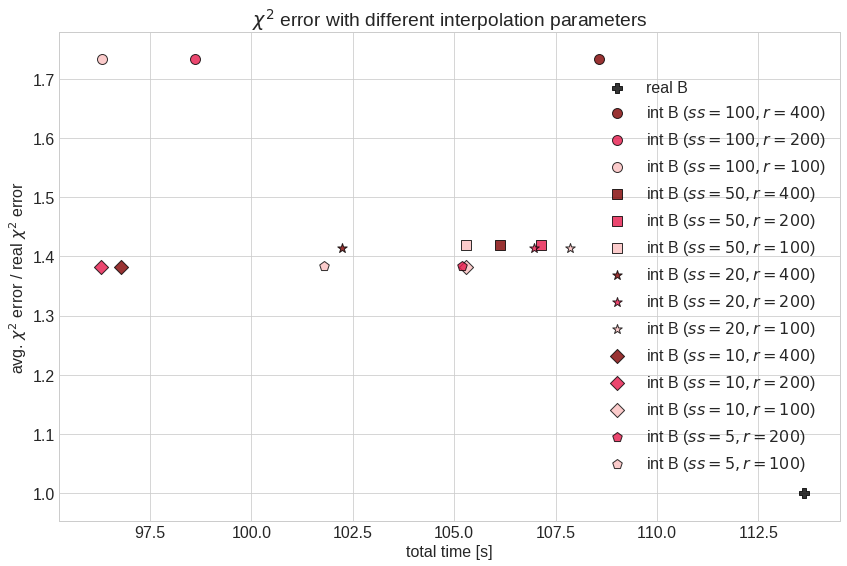

In [50]:
matplotlib.rcParams.update({'font.size': 16})
scatter_plot(total_time, avg_fchi2, colors, markers, names, "linear")
matplotlib.rcParams.update({'font.size': 20})

# Real B vs Interpolated B ss=10cm

In [51]:
mdir        = "../data/bfield_tests/"
labels      = ["real B",  "ss=100",    "ss=50",     "ss=20",     "ss=10",     "ss=5"     ]
dirs        = ["real_B/", "sim_B100/", "sim_B050/", "sim_B020/", "sim_B010/", "sim_B005/"]
filenames = ["e05", "e06", "e12", "e17", "e25", "e30", "e35", "e36", "e38",
             "e40", "e44", "e48", "e52", "e55", "e57", "e60", "e63", "e67"]
B_chi2      = [[], [], [], [], [], []]

for i in range(len(dirs)):
    for filename in filenames:
        B_chi2[i].append(file_to_arr(mdir + dirs[i] + filename))

In [52]:
real_B = B_chi2[0]
real_B_label = labels[0]
ss10_B = B_chi2[4]
ss10_B_label = "interpolated B, $ss=10$"

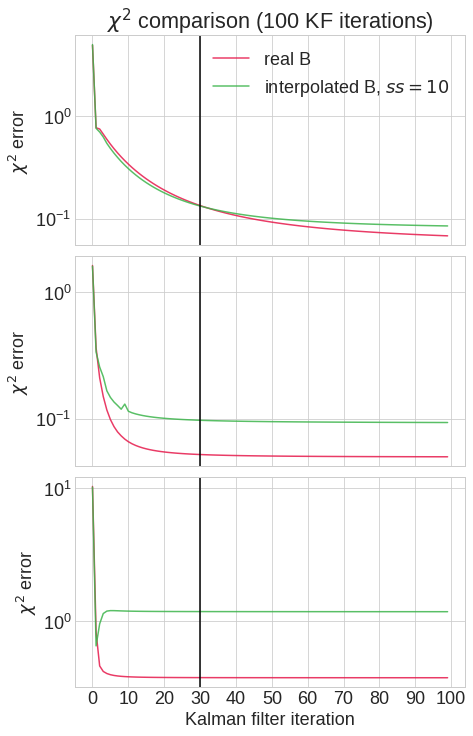

In [55]:
matplotlib.rcParams.update({'font.size': 18})
n_subplots = 3
# stracks = [17, 1, 0, 5, 3, 15]
stracks = [2, 5, 0]

ax = np.empty([n_subplots, 1])
f, ax = plt.subplots(n_subplots, 1, sharex="col", sharey="row")
f.set_size_inches(7,12)

index = np.arange(len(real_B[0]))
for i in range(0, n_subplots):
    ax[i].plot(index, real_B[stracks[i]],   c=c_red, alpha=baralpha, label=real_B_label)
    ax[i].plot(index, ss10_B[stracks[i]],   c=c_gre, alpha=baralpha, label=ss10_B_label)
    ax[i].set_yscale("log")
    ax[i].axvline(x=30, color=c_bla)

ax[0].set_title("$\chi^2$ comparison (100 KF iterations)")
ax[0].legend()

plt.xticks(np.arange(0, 101, 10))
# plt.yticks(np.arange(0, 10, 1))

for i in range(n_subplots):
    ax[i].set_ylabel("$\chi^2$ error")
ax[n_subplots-1].set_xlabel("Kalman filter iteration")

f.subplots_adjust(hspace=0.05, wspace=0)
plt.show()

# Real B vs interpolated B 20 steps

In [56]:
h_dirs      = ["simB_i00/","simB_i05/", "simB_i10/", "simB_i15/", "simB_i20/"]
h_labels    = ["real B",  "5 iterations",   "10 iterations",  "15 iterations",  "interpolated B (20 iterations)"]

B_hfchi2 = []
for i in range(len(h_dirs)):
    B_hfchi2.append([])
    for filename in filenames[:6]:
        B_hfchi2[i].append(file_to_arr(mdir + h_dirs[i] + filename))

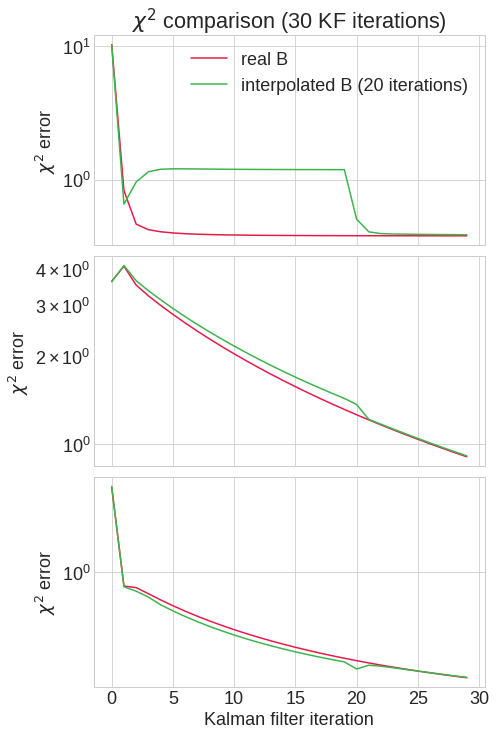

In [57]:
n_subplots = 3

ax = np.empty([n_subplots, 1])
f, ax = plt.subplots(n_subplots, 1, sharex="col", sharey="row")
f.set_size_inches((7,12))

index = np.arange(len(B_hfchi2[0][0]))
for i in range(0, n_subplots):
    ax[i].plot(index, B_hfchi2[0][i], c=c_red, label=h_labels[0])
    ax[i].plot(index, B_hfchi2[4][i], c=c_gre, label=h_labels[4])
    ax[i].set_yscale("log")
    ax[i].set_ylabel("$\chi^2$ error")

ax[0].set_title("$\chi^2$ comparison (30 KF iterations)")
ax[0].legend()
ax[2].set_xlabel("Kalman filter iteration")

plt.xticks(np.arange(0, 31, 5))

f.subplots_adjust(hspace=0.05, wspace=0)
plt.show()